# Data Cleaning

In this notebook the original dataframe will be cleaned.
These are the rules:
- no recipes without rating
- remove recipes with "too" specific ingredients
- exclude all drinks (For the prototype)
- exclude recipes with tags of low frequency (<5)
- remove recipes without description

## joining both df's 
- grouping by recipe id to get average score
- droping NANs

In [1]:
import pandas as pd
import matplotlib..pyplot as plt
reviews_df = pd.read_csv("../../Fed_up/data/raw/RAW_interactions.csv")
recipes_df = pd.read_csv("../../Fed_up/data/raw/RAW_recipes.csv")
recipes_df.rename(columns={"id":"recipe_id"}, inplace=True)

In [2]:
merged_df = recipes_df.merge(reviews_df, on="recipe_id", how="inner")

In [119]:
review_merge_df = merged_df.groupby(by="name").agg({"recipe_id":"first","minutes":"first","contributor_id":"first","submitted":"first","tags":"first","nutrition":"first","steps":"first", "description":"first", "ingredients": "first", "n_ingredients":"first", "rating":"mean"}).dropna()

In [122]:
review_merge_df.tail(100)

,recipe_id,minutes,contributor_id,submitted,tags,nutrition,steps,description,ingredients,n_ingredients,rating
name,,,,,,,,,,,
zucchini with fire roasted tomatoes,389291,20,1188379,2009-09-08,"['30-minutes-or-less', 'time-to-make', 'course...","[79.4, 7.0, 22.0, 10.0, 5.0, 3.0, 2.0]","['in a large skillet , heat olive oil over med...",paula deen 2009.,"['olive oil', 'zucchini', 'fire-roasted tomato...",5,5.000000
zucchini with garlic and dried crushed red pepper,82264,8,62408,2004-01-27,"['15-minutes-or-less', 'time-to-make', 'course...","[87.3, 10.0, 10.0, 0.0, 3.0, 4.0, 1.0]",['heat oil in heavy large skillet over medium ...,easy way to spice up zucchini,"['olive oil', 'zucchini', 'garlic', 'dry crush...",6,4.000000
zucchini with green chiles,51760,16,49304,2003-01-17,"['30-minutes-or-less', 'time-to-make', 'course...","[44.7, 3.0, 11.0, 4.0, 2.0, 1.0, 1.0]",['heat oil in a large skillet over medium-high...,zucchini with chiles what could be better. the...,"['vegetable oil', 'zucchini', 'crookneck yello...",8,5.000000
zucchini with green peppercorns lemon and parmesan,54175,10,58038,2003-02-16,"['15-minutes-or-less', 'time-to-make', 'course...","[43.1, 5.0, 3.0, 0.0, 1.0, 2.0, 1.0]","['whisk together the lemon juice , olive oil ,...",saw this on foodtv's cooking thin show. it is ...,"['lemon', 'extra virgin olive oil', 'salt', 'b...",7,5.000000
zucchini with jalapeno monterey jack,320622,10,305531,2008-08-20,"['15-minutes-or-less', 'time-to-make', 'course...","[125.6, 13.0, 7.0, 6.0, 16.0, 27.0, 1.0]",['spread the zucchini in a microwave-safe dish...,simple and yummy!,"['zucchini', 'monterey jack pepper cheese', 'a...",3,4.000000
zucchini with mint,26195,50,21752,2002-04-24,"['60-minutes-or-less', 'time-to-make', 'course...","[49.6, 5.0, 7.0, 0.0, 2.0, 2.0, 1.0]","['preheat the oven to 450 degrees f', 'heat 2 ...",posted in answer to a recipe request by friede...,"['zucchini', 'extra virgin olive oil', 'crushe...",6,5.000000
zucchini with mint and parsley,151226,19,130865,2006-01-11,"['30-minutes-or-less', 'time-to-make', 'course...","[117.0, 16.0, 8.0, 0.0, 3.0, 7.0, 1.0]","['heat a large skillet over medium heat', 'cut...",this recipe came from the food network website...,"['zucchini', 'extra virgin olive oil', 'garlic...",7,5.000000
zucchini with onion and tomato,99058,40,160217,2004-09-02,"['60-minutes-or-less', 'time-to-make', 'course...","[119.8, 16.0, 13.0, 0.0, 3.0, 7.0, 2.0]","['cut the zucchini in bite size pieces', 'chop...","this is a basic recipe for zucchini. zucchini,...","['olive oil', 'zucchini', 'onion', 'tomatoes',...",8,4.500000
zucchini with orange rice,100370,20,87023,2004-09-22,"['30-minutes-or-less', 'time-to-make', 'course...","[101.7, 7.0, 14.0, 3.0, 10.0, 15.0, 3.0]","['halve zucchini lengthwise', 'place in a sing...",simple tasty recipe for using zucchinis when i...,"['zucchini', 'cooked brown rice', 'green onion...",8,5.000000


## getting the ingredient list

In [10]:
ingredients = review_merge_df["ingredients"]

In [14]:
ingredients_list_clean = []
ingredients_list_for_counting = []
for i in ingredients:
    for j in i.split(","):
        j_cl = j.replace("[","").replace("]","").replace("'","").replace('"','').strip()
        if j_cl not in ingredients_list_clean:
            ingredients_list_clean.append(j_cl)
        ingredients_list_for_counting.append(j_cl)

In [15]:
print(f'{len(ingredients_list_clean)} unique ingredients appear {len(ingredients_list_for_counting)} times')

14700 unique ingredients appear 2046651 times


### Removing too specific ingredients
how? By using a counting functions that counts the occurrence of each ingredient and for the sake of the project it will be assumed that this way rare branded US specific ingredients will be removed

In [16]:
def count_occurrence(list_clean,list_tot, threshold):
    exclude =[]
    for i in list_clean:
        count = 0
        for j in list_tot:
            if j == i:
                count+=1
        if count < threshold:
            exclude.append(i)
    return exclude

In [19]:
low_use_ingredients = count_occurrence(ingredients_list_clean,ingredients_list_for_counting,2)

In [25]:
low_use_ingredients.sort()
low_use_ingredients

['10 inch low-fat flour tortillas',
 '10-inch baked pie shells',
 '10-inch corn tortillas',
 '10-inch sun-dried tomato tortillas',
 '10-minute herb stuffing mix',
 '100-calorie honey maid cinnamon graham cracker crisps',
 '100-calorie snack pack tapioca pudding',
 '12-inch flour tortilla',
 '12-inch tortilla',
 '13 bean soup mix',
 '15 inch pizza crusts',
 '16 bean mix',
 '2% large-curd cottage cheese',
 '3-cheese gourmet cheddar blend cheese',
 '3-inch pie pastry tart shells',
 '3-inch tart shells',
 '4% fat cottage cheese',
 '5-inch pitas',
 '6 cheese zesty mexican cheese blend',
 '6 inch fat-free whole wheat pita bread',
 '6-inch whole wheat tortilla',
 '7 bean mix',
 '8-grain bread',
 '8-inch 97% fat free flour tortillas',
 '8-inch double-crust pie shell',
 '8-inch low-carb whole wheat tortilla',
 '8-inch ready-made graham cracker crust',
 '8-inch unbaked pie shell',
 '8-inch whole wheat flour tortillas',
 '9 baked deep dish pie crust',
 '9 in. unbaked pastry shells',
 '9 inch choc

In [29]:
len(low_use_ingredientse_ingredients)

3459

In [62]:
def remove_list_from_df(df, tag_list, column):
    data = df
    for i in tag_list:
        data = data[~data[column].str.contains(i)]
    return data

In [28]:
df_merged_ing = remove_list_from_df(review_merge_df, low_use_ingredients)

c:\users\admin\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


## getting the tags of the df to remove drinks

In [30]:
tags = df_merged_ing["tags"]

In [31]:
tag_list_clean = []
tag_list = []
for i in tags:
    for j in i.split(","):
        ji = j.replace("'", "").replace(" ","").replace("]", "").replace("[", "")
        tag_list.append(ji)
        if ji not in tag_list_clean:
            tag_list_clean.append(ji)

In [32]:
drink_tags=['cocktails', 'punch', "non-alcoholic", "ice-cream", "brewing", "beverages", "smoothies"]

In [63]:
df_merged_ing_drink = remove_list_from_df(df_merged_ing, drink_tags, "tags")

In [64]:
df_merged_ing_drink.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189033 entries, 0 carb   0 cal gummy worms to zydeco ya ya deviled eggs
Data columns (total 10 columns):
minutes           189033 non-null int64
contributor_id    189033 non-null int64
submitted         189033 non-null object
tags              189033 non-null object
nutrition         189033 non-null object
steps             189033 non-null object
description       189033 non-null object
ingredients       189033 non-null object
n_ingredients     189033 non-null int64
rating            189033 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 15.9+ MB


## remove time outliers

In [65]:
df_post_time = df_merged_ing_drink[df_merged_ing_drink.minutes < 300]

In [79]:
df_post_time.head(3)

,minutes,contributor_id,submitted,tags,nutrition,steps,description,ingredients,n_ingredients,rating
name,,,,,,,,,,
0 carb 0 cal gummy worms,45,134414,2008-02-02,"['60-minutes-or-less', 'time-to-make', 'course...","[384.7, 0.0, 0.0, 70.0, 159.0, 0.0, 6.0]","['stir all ingredients until dissolved', 'pour...",these are delicious and guilt free!\r\n\r\n*if...,"['sugar-free jello', 'gelatin', 'boiling water']",3,3.8
0 fat chunky watermelon salsa,45,89831,2006-07-10,"['60-minutes-or-less', 'time-to-make', 'course...","[57.7, 0.0, 39.0, 0.0, 2.0, 0.0, 4.0]",['using a small sharp knife cut peel and white...,this is fantastic served with grilled seafood ...,"['lime', 'watermelon', 'cucumber', 'green onio...",8,5.0
0 point ice cream only 1 ingredient,125,2283828,2012-06-05,"['time-to-make', 'course', 'main-ingredient', ...","[304.1, 13.0, 121.0, 3.0, 13.0, 9.0, 19.0]","['1) peel your bananas first', '2) cut them in...",yummy!! (got this recipe from \r\nhttp://www.t...,"['bananas', 'peanut butter', 'honey']",3,5.0


## removing outliers with n_ingredients >20

In [76]:
df_post_ings = df_post_time[df_post_time.n_ingredients <21]

In [80]:
df_post_ings.head(3)

,minutes,contributor_id,submitted,tags,nutrition,steps,description,ingredients,n_ingredients,rating
name,,,,,,,,,,
0 carb 0 cal gummy worms,45,134414,2008-02-02,"['60-minutes-or-less', 'time-to-make', 'course...","[384.7, 0.0, 0.0, 70.0, 159.0, 0.0, 6.0]","['stir all ingredients until dissolved', 'pour...",these are delicious and guilt free!\r\n\r\n*if...,"['sugar-free jello', 'gelatin', 'boiling water']",3,3.8
0 fat chunky watermelon salsa,45,89831,2006-07-10,"['60-minutes-or-less', 'time-to-make', 'course...","[57.7, 0.0, 39.0, 0.0, 2.0, 0.0, 4.0]",['using a small sharp knife cut peel and white...,this is fantastic served with grilled seafood ...,"['lime', 'watermelon', 'cucumber', 'green onio...",8,5.0
0 point ice cream only 1 ingredient,125,2283828,2012-06-05,"['time-to-make', 'course', 'main-ingredient', ...","[304.1, 13.0, 121.0, 3.0, 13.0, 9.0, 19.0]","['1) peel your bananas first', '2) cut them in...",yummy!! (got this recipe from \r\nhttp://www.t...,"['bananas', 'peanut butter', 'honey']",3,5.0


In [83]:
def counting_tag(tag_list, string):
    count=0
    for i in tag_list:
        if i.lower() == string:
            count +=1
    print(f'The tag "{string}" is used in {count} recipes')

In [112]:
counting_tag(tag_list, "easy")

The tag "easy" is used in 109053 recipes


(array([3.8980e+03, 1.6000e+01, 9.3000e+01, 3.2000e+01, 1.0000e+01,
        1.0860e+03, 9.8000e+01, 2.7600e+02, 2.5600e+02, 2.7000e+01,
        2.1170e+03, 3.7100e+02, 2.6950e+03, 6.7200e+02, 1.3800e+02,
        6.4520e+03, 2.7160e+03, 2.7790e+03, 3.6620e+03, 1.2090e+03,
        2.8237e+04, 8.1690e+03, 1.7358e+04, 1.4653e+04, 8.2660e+04]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 25 artists>)

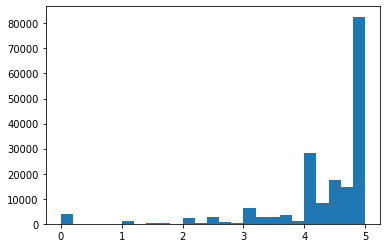

In [107]:
plt.hist(df_post_ings.rating, bins=25)

In [108]:
shelf=["chocolate", "milk", "flour"]

In [ ]:
def find_recipe(shelf, max_ing, data):
    df = data[data["n_ingredients"] <= max_ing]
    

In [126]:
merged_df.head(49)

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,2006-08-27,5,This recipe was wonderful. Instead of using t...
5,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,319943,2009-07-18,4,"We liked this, but the I only baked for 15 min..."
6,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,674022,2011-04-10,5,No leftovers here. As Coleen114 mentioned this...
7,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,255952,2005-10-27,4,I added black beans and corn to this and LOVED...
8,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,296809,2008-06-11,4,"This is an excellent, easy-fix side-dish w/ton..."
9,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,1232243,2009-04-15,5,This is wonderful and super easy! I work with...


In [127]:
merged_df.steps[49]

"['dredge pork chops in mixture of flour , salt , dry mustard and garlic powder', 'brown in oil in a large skillet', 'place browned pork chops in a crock pot', 'add the can of soup , undiluted', 'cover and cook on low for 6-8 hours']"